<a href="https://colab.research.google.com/github/ezraflavine/Iris_dataset_pythonweek7_assignment/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS DATASET ANALYSIS**

**Load and read Dataset**

In [ ]:
import pandas as pd

# Load the uploaded Iris dataset
file_path = "/content/iris.csv"

try:
    iris_df = pd.read_csv(file_path)
    load_success = True
except Exception as e:
    iris_df = None
    load_success = False
    error_message = str(e)

load_success, iris_df.head() if load_success else error_message


(True,
    sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa)

**Cleaning the Dataset**

In [ ]:
# Check data types and missing values
data_info = iris_df.info()
missing_values = iris_df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Clean the dataset (drop rows with missing values if any)
iris_df_cleaned = iris_df.dropna()
rows_dropped = len(iris_df) - len(iris_df_cleaned)
iris_df_cleaned


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Basic summary statistics**


In [ ]:
# Basic summary statistics
summary_stats = iris_df_cleaned.describe()

data_info, missing_values, rows_dropped, summary_stats

(None,
 sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64,
 0,
        sepal_length  sepal_width  petal_length  petal_width
 count    150.000000   150.000000    150.000000   150.000000
 mean       5.843333     3.054000      3.758667     1.198667
 std        0.828066     0.433594      1.764420     0.763161
 min        4.300000     2.000000      1.000000     0.100000
 25%        5.100000     2.800000      1.600000     0.300000
 50%        5.800000     3.000000      4.350000     1.300000
 75%        6.400000     3.300000      5.100000     1.800000
 max        7.900000     4.400000      6.900000     2.500000)

In [ ]:
# Group by species and compute mean of numeric columns
grouped_means = iris_df_cleaned.groupby('species').mean(numeric_only=True)

# Identify interesting patterns: which species has the longest average petal length
longest_petal_species = grouped_means['petal_length'].idxmax()
longest_petal_value = grouped_means['petal_length'].max()

grouped_means, (longest_petal_species, longest_petal_value)


(            sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa             5.006        3.418         1.464        0.244
 versicolor         5.936        2.770         4.260        1.326
 virginica          6.588        2.974         5.552        2.026,
 ('virginica', 5.5520000000000005))

**Visualization**

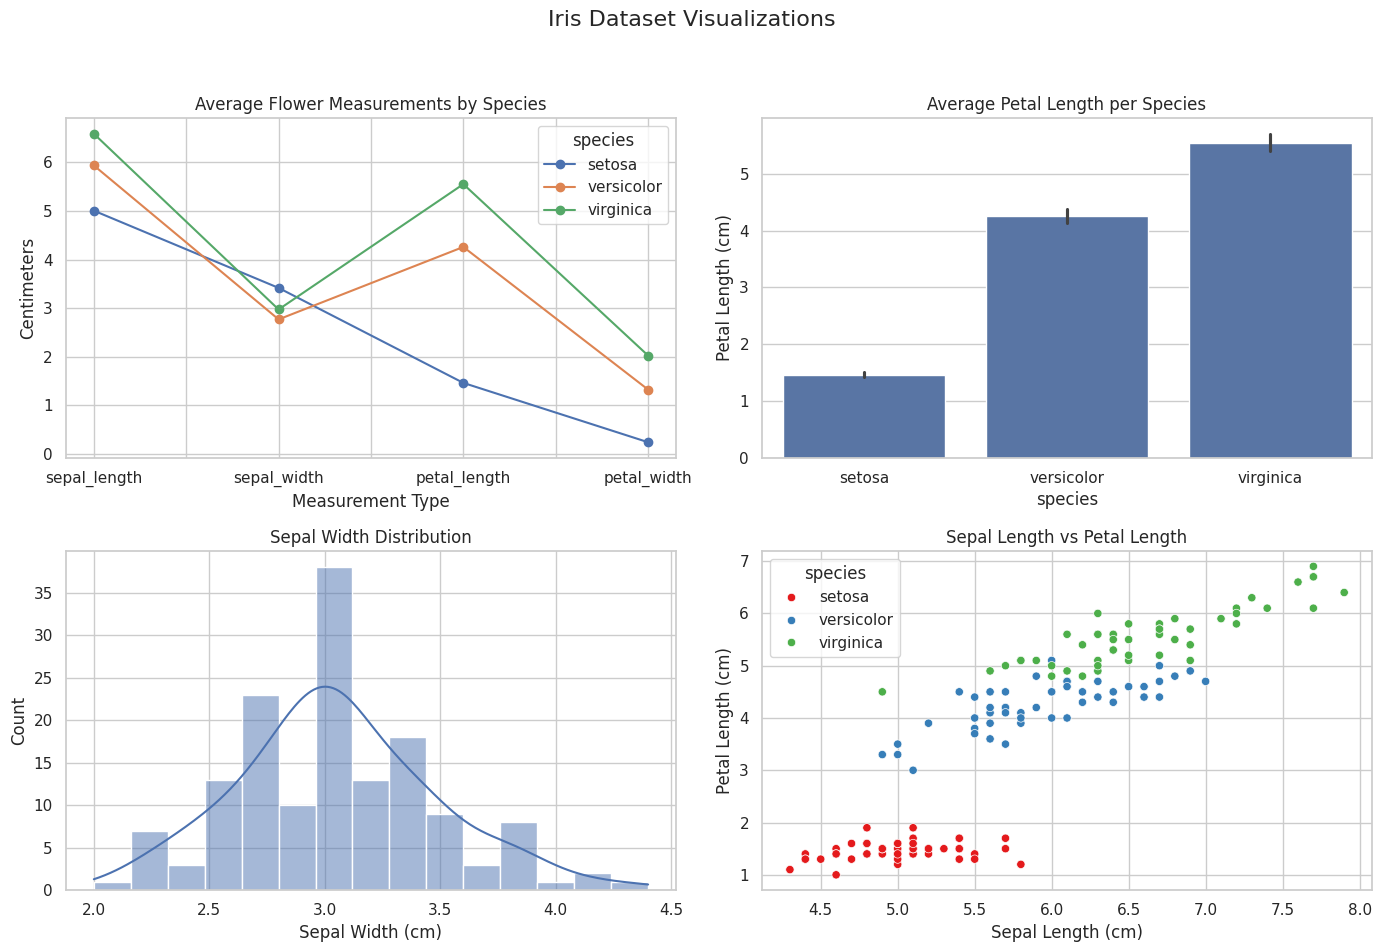

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set(style="whitegrid")

# Grouped means for line chart
grouped_means = iris_df.groupby('species').mean(numeric_only=True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Iris Dataset Visualizations', fontsize=16)

# Line Chart - Average measurements per species
grouped_means.T.plot(kind='line', ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Average Flower Measurements by Species')
axs[0, 0].set_ylabel('Centimeters')
axs[0, 0].set_xlabel('Measurement Type')

# Bar Chart - Average petal length per species
sns.barplot(x='species', y='petal_length', data=iris_df, ax=axs[0, 1])
axs[0, 1].set_title('Average Petal Length per Species')
axs[0, 1].set_ylabel('Petal Length (cm)')

# Histogram - Distribution of sepal width
sns.histplot(iris_df['sepal_width'], bins=15, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Sepal Width Distribution')
axs[1, 0].set_xlabel('Sepal Width (cm)')

# Scatter Plot - Sepal length vs Petal length
sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue='species',
    data=iris_df,
    palette='Set1',
    ax=axs[1, 1]
)
axs[1, 1].set_title('Sepal Length vs Petal Length')
axs[1, 1].set_xlabel('Sepal Length (cm)')
axs[1, 1].set_ylabel('Petal Length (cm)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**Conclusion**

Insights from Basic Statistics

1. Petal length has the widest range and variability among all features, suggesting it's a strong candidate for distinguishing between species.

2. Setosa generally has smaller measurements in all features compared to Virginica and Versicolor.

3. Virginica shows the largest average values in sepal and petal dimensions, making it the most distinct species in size.




Insights from Grouped Analysis

Average Petal Length by Species:

1. Setosa: 1.46 cm

2. Versicolor: 4.26 cm

3. Virginica: 5.55 cm







Insights from Visualizations

1. Line Chart - Average Measurements per Species
Confirms that Setosa has the smallest, and Virginica the largest, dimensions.

All species show a consistent measurement pattern with sepal length > sepal width > petal length > petal width.

2. Bar Chart - Average Petal Length
Visually reinforces that petal length is a key feature that separates the species.

3. Histogram - Sepal Width Distribution
Most sepal widths fall between 2.5 cm and 3.5 cm.

Slight skew in distribution suggests different species may cluster in different sepal width ranges.

4. Scatter Plot - Sepal Length vs. Petal Length
Clear separation of species:

Setosa forms a tight cluster with small values.

Versicolor and Virginica show linear separation with Virginica tending toward higher values.

This overview indicates that petal and sepal length together can be strong predictors for species classification.

Generally:
1. The Iris dataset is well-suited for classification problems, especially using features like petal length and petal width.

2. The dataset is clean, balanced, and offers distinct clusters that can be easily visualized.

3. Species-specific traits (like longer petals for Virginica) make feature engineering straightforward.

